# Logistic Regression

## [Logistic Regression ]

### 1. Logistic Regression 개념

* Linear Regression + Logistic Function
  * Linear Regression : $y = \beta _0 + \beta _1 x $
  * Logistic Function : $y = \frac {1} {1+e^{-x}}$
  * Logistic Regression : $P(y =1) = \frac {1} {1+e^{-(\beta _0 + \beta _1 x) }}$
* 정답이 **범주형**인 경우에 사용하는 Regression Model


* Threshold : 확률값을 범주형으로 변환할 때의 기준
  * Threshold = 0.5로 잡고 0.5보다 크면 1 작으면 0으로 변환

* AUROC : Area Under ROC
  * 정확도가 Threshold에 따라 변하는 문제를 보완하기 위한 지표
  * Threshold에 의해 값이 변하지 않는 지표 사용 => AUROC
  * <img src="../Images/Machine_Learning/Logistic_Regression_1.JPG" width="600" height="400" title=""/>
<img src="../Images/Machine_Learning/Logistic_Regression_2.JPG" width="400" height="200" title=""/>
<img src="../Images/Machine_Learning/Logistic_Regression_3.JPG" width="400" height="200" title=""/>

* Best Threshold
  * 요덴스 인덱스
  * J가 가장 큰 Threshold를 사용
  * <img src="../Images/Machine_Learning/Logistic_Regression_4.JPG" width="600" height="300" title=""/>

* 범주가 2개보다 큰 경우 : One or Nothing(자기자신 외 나머지)
  * <img src="../Images/Machine_Learning/Logistic_Regression_5.JPG" width="600" height="300" title=""/>

### 2. 지도학습 검증 방법

<img src="../Images/Machine_Learning/Logistic_Regression_6.JPG" width="700" height="500" title=""/>

* ROC cut off 방법 중 Youden Index 사용
  * ROC 커브의 각 점에서 기울기가 1인 직선을 그렸을 때 y절편이 가장 큰 값
  * max(민감도 - (1-특이도))
  * TPR - FPR

---

## [ Logistic Regression : breast_cancer 데이터]

### 1. 데이터 load 및 EDA

#### 데이터 load

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

In [68]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

* breast_cancer 변수명

In [69]:
'''
radius (mean of distances from center to points on the perimeter)
texture (standard deviation of gray-scale values)
perimeter
area
smoothness (local variation in radius lengths)
compactness (perimeter^2 / area - 1.0)
concavity (severity of concave portions of the contour)
concave points (number of concave portions of the contour)
symmetry
fractal dimension ("coastline approximation" - 1)
'''

cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

* breast_cancer 정답

In [70]:
'''
malignant : 음성(1)
benign : 양성(0)
'''

cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [71]:
data, target = cancer.data, cancer.target

data.shape, data[0], target[0]

((569, 30),
 array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01]),
 0)

#### 데이터 EDA

In [72]:
df = pd.DataFrame(data, columns = cancer.feature_names)

df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [73]:
df.isnull().any()

mean radius                False
mean texture               False
mean perimeter             False
mean area                  False
mean smoothness            False
mean compactness           False
mean concavity             False
mean concave points        False
mean symmetry              False
mean fractal dimension     False
radius error               False
texture error              False
perimeter error            False
area error                 False
smoothness error           False
compactness error          False
concavity error            False
concave points error       False
symmetry error             False
fractal dimension error    False
worst radius               False
worst texture              False
worst perimeter            False
worst area                 False
worst smoothness           False
worst compactness          False
worst concavity            False
worst concave points       False
worst symmetry             False
worst fractal dimension    False
dtype: boo

* 양성과 음성의 비율

In [74]:
pd.Series(target).value_counts()

1    357
0    212
dtype: int64

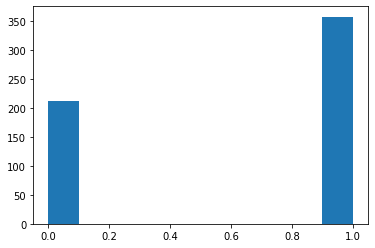

In [75]:
plt.hist(target);

* mean radius와 당뇨병의 관게 확인

Text(0, 0.5, 'target')

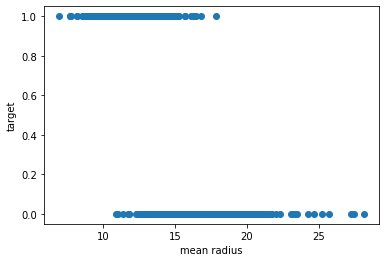

In [76]:
plt.scatter(df['mean radius'], target)
plt.xlabel('mean radius')
plt.ylabel('target')

### 2. Linear Regression and Categorical Label

#### 2-1. 학습

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=2022)

print("train data 개수:", len(X_train))
print("test data 개수:", len(X_test))

train data 개수: 398
test data 개수: 171


In [78]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

#### 2-2. 예측

In [79]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

#### 2-3. 시각화
* 0~1 사이가 아닌 벗어나는 값이 생성됨

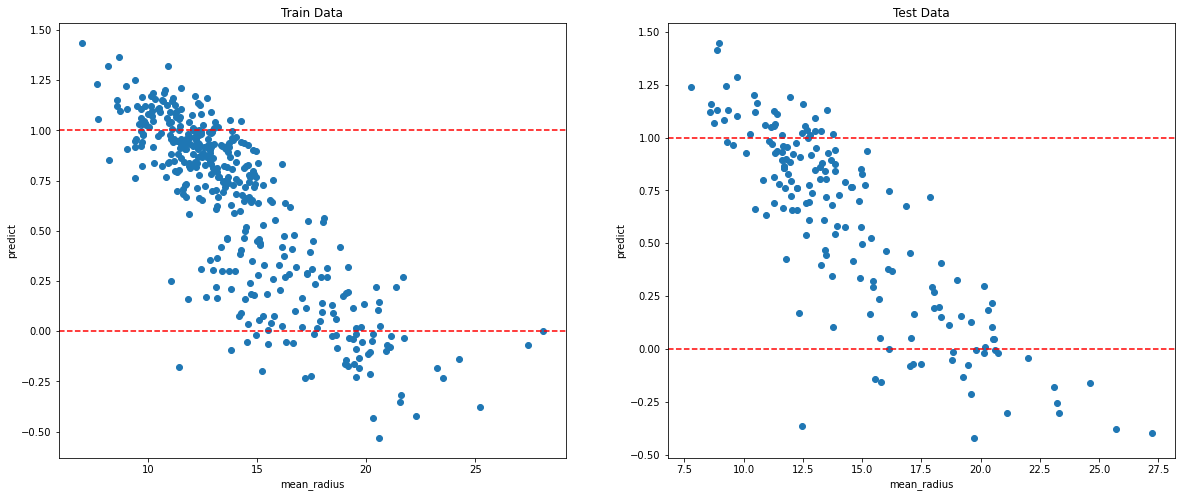

In [80]:
fig, a = plt.subplots(nrows=1, ncols=2, figsize=(20,8))

pred = [('Train', X_train, pred_train), ('Test', X_test, pred_test)]

for idx, (name, data, pred) in enumerate(pred):
    ax = a[idx]
    ax.scatter(data[:,0], pred)
    ax.axhline(0, c='r', linestyle='--')
    ax.axhline(1, c='r', linestyle='--')
    ax.set_xlabel("mean_radius")
    ax.set_ylabel("predict")
    ax.set_title(f"{name} Data")

### 3. ROC curve / Youden's Index 을 사용한 Logistic Regression

#### 3-1. AUROC와 Best Threshold 선정
* Linear Regression의 성능을 측정하기 위해서는 우선 예측값을 0과 1로 변환시켜주어야 함 => Threshold로 분류
* Youden's Index를 이용해 Best Threshold를 찾은 후 0과 1로 변화시킨 후 정확도 측정

In [81]:
from sklearn.metrics import auc, roc_curve

fpr, tpr, threshold = roc_curve(y_train, pred_train) # roc_curve(실제값, 예측값)는 fpr, tpr, threshold를 return함
auroc = auc(fpr, tpr)

fpr, tpr, threshold, auroc

(array([0.        , 0.        , 0.        , 0.00694444, 0.00694444,
        0.01388889, 0.01388889, 0.02083333, 0.02083333, 0.03472222,
        0.03472222, 0.04166667, 0.04166667, 0.08333333, 0.08333333,
        0.15277778, 0.15277778, 1.        ]),
 array([0.        , 0.00393701, 0.86614173, 0.86614173, 0.91732283,
        0.91732283, 0.9488189 , 0.9488189 , 0.97244094, 0.97244094,
        0.98818898, 0.98818898, 0.99212598, 0.99212598, 0.99606299,
        0.99606299, 1.        , 1.        ]),
 array([ 2.4361067 ,  1.4361067 ,  0.73541392,  0.73504832,  0.69821109,
         0.69157174,  0.66179116,  0.65237359,  0.63746448,  0.6287956 ,
         0.60051723,  0.59041758,  0.5843251 ,  0.51934856,  0.49908788,
         0.42737293,  0.42101901, -0.53268251]),
 0.9970745844269466)

* AUROC : ROC curve 아래 면적

Text(0, 0.5, 'tpr')

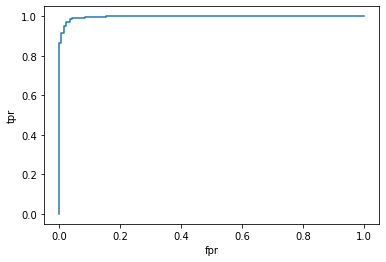

In [82]:
plt.plot(fpr, tpr)
plt.xlabel("fpr")
plt.ylabel("tpr")

* Best Threshold

In [83]:
print('AUROC :', auroc)
print(np.argmax(tpr-fpr)) # 최대값을 갖는 인덱스 리턴

AUROC : 0.9970745844269466
10


In [84]:
J = tpr - fpr 
idx = np.argmax(J)
best_thresh = threshold[idx]
print(f"Best Threshold is {best_thresh:.4f}")
print(f"Best Threshold's sensitivity is {tpr[idx]:.4f}")
print(f"Best Threshold's specificity is {1-fpr[idx]:.4f}")
print(f"Best Threshold's J is {J[idx]:.4f}") # tpr[idx]- fpr[idx]의 max

Best Threshold is 0.6005
Best Threshold's sensitivity is 0.9882
Best Threshold's specificity is 0.9653
Best Threshold's J is 0.9535


In [85]:
J

array([0.        , 0.00393701, 0.86614173, 0.85919729, 0.91037839,
       0.90343395, 0.93493001, 0.92798556, 0.95160761, 0.93771872,
       0.95346675, 0.94652231, 0.95045932, 0.90879265, 0.91272966,
       0.84328521, 0.84722222, 0.        ])

Text(0, 0.5, 'tpr')

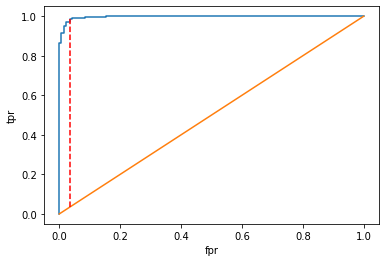

In [86]:
plt.plot(fpr, tpr)
plt.plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10)) # 0부터 1까지 10개의 일정 간격으로 
plt.plot((fpr[idx], fpr[idx]), (fpr[idx], tpr[idx]), color="red", linestyle="--")
plt.xlabel("fpr")
plt.ylabel("tpr")

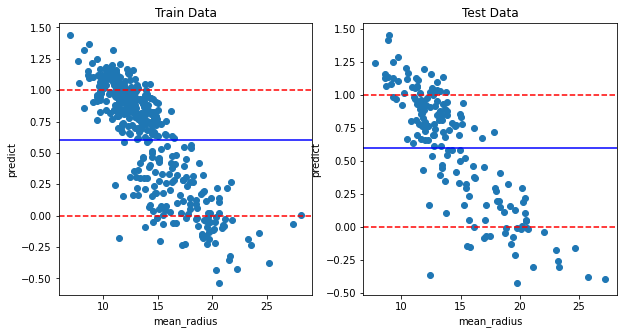

In [87]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

preds = [
    ("Train", X_train, pred_train),
    ("Test", X_test, pred_test)
]
for idx, (name, d, pred) in enumerate(preds):
    ax = axes[idx]
    ax.scatter(x=d[:,0], y=pred)
    ax.axhline(0, color="red", linestyle="--")
    ax.axhline(1, color="red", linestyle="--")
    ax.set_xlabel("mean_radius")
    ax.set_ylabel("predict")
    ax.set_title(f"{name} Data")
    ax.axhline(best_thresh, color="blue") # 파란선 기준으로 양성/음성을 나누게 됨

* Best Threshold를 통해 예측값을 0,1로 변환 후 정확도

In [88]:
train_pred_label = list(map(int, (pred_train > best_thresh)))
test_pred_label = list(map(int, (pred_test > best_thresh)))

In [89]:
from sklearn.metrics import accuracy_score

linear_train_accuracy = accuracy_score(y_train, train_pred_label)
linear_test_accuracy = accuracy_score(y_test, test_pred_label)

print(f"Train accuracy is : {linear_train_accuracy:.2f}")
print(f"Test accuracy is : {linear_test_accuracy:.2f}")

Train accuracy is : 0.98
Test accuracy is : 0.96


### 4. Logistic Regression 방법

#### 4-1. 정규화

* 정규화 : Logistic Regression은 학습하기에 앞서 학습시킬 데이터를 정규화
  * exp가 있는데, exp는 값이 클 경우 overflow가 일어날 수 있기 때문

In [90]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

StandardScaler()

* 정규화는 항상 train data를 이용해 학습하고 valid, test 데이터를 변환
  * 모든 데이터를 한번에 학습할 경우 본 적이 없는 valid data의 평균과 분산이 반영되고 이는 overfitting을 일으키는 원인

In [91]:
# x_train으로 scaler 학습 후, 해당 scaler로 train data와 test data 정규화

scaled_train_data = scaler.transform(X_train)
scaled_test_data = scaler.transform(X_test)

#### 4-2. 학습

In [92]:
from sklearn.linear_model import LogisticRegression

logit_regressor = LogisticRegression()

# 정규화환 X_train과 y_train으로 모델 학습
logit_regressor.fit(scaled_train_data, y_train)

LogisticRegression()

#### 4-3. 예측

* predict

In [93]:
train_pred = logit_regressor.predict(scaled_train_data)
test_pred = logit_regressor.predict(scaled_test_data)

train_pred[:10]

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 1])

* predict_proba

In [94]:
train_pred_logit = logit_regressor.predict_proba(scaled_train_data)
test_pred_logit = logit_regressor.predict_proba(scaled_test_data)

train_pred_logit[:10]

array([[9.22840419e-01, 7.71595807e-02],
       [3.61589175e-02, 9.63841083e-01],
       [9.99555083e-01, 4.44916704e-04],
       [9.07408714e-05, 9.99909259e-01],
       [9.99526968e-01, 4.73032464e-04],
       [2.45174081e-04, 9.99754826e-01],
       [1.96196841e-03, 9.98038032e-01],
       [9.78711944e-01, 2.12880560e-02],
       [1.12795845e-01, 8.87204155e-01],
       [6.19146454e-04, 9.99380854e-01]])

#### 4-4. 평가

* 데이터의 AUROC를 계산하기 위해서는 1의 클래스로 분류될 확률 하나만 필요

In [95]:
train_pred_logit = train_pred_logit[:, 1]
test_pred_logit = test_pred_logit[:, 1]

In [96]:
from sklearn.metrics import auc, roc_curve

fpr, tpr, threshold = roc_curve(y_train, train_pred_logit)
auroc = auc(fpr, tpr)

Text(0, 0.5, 'tpr')

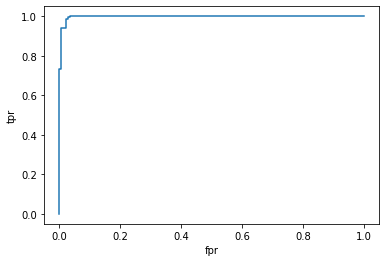

In [97]:
plt.plot(fpr, tpr)
plt.xlabel("fpr")
plt.ylabel("tpr")

In [98]:
print(f"AUROC : {auroc:.4f}")
print('AUROC : %.4f' %(auroc))

AUROC : 0.9972
AUROC : 0.9972


In [99]:
J = tpr - fpr
idx = np.argmax(J)
best_thresh = threshold[idx]

print(f"Best Threshold is {best_thresh:.4f}")
print(f"Best Threshold's sensitivity is {tpr[idx]:.4f}")
print(f"Best Threshold's specificity is {1-fpr[idx]:.4f}")
print(f"Best Threshold's J is {J[idx]:.4f}")

Best Threshold is 0.4990
Best Threshold's sensitivity is 0.9961
Best Threshold's specificity is 0.9722
Best Threshold's J is 0.9683


Text(0, 0.5, 'tpr')

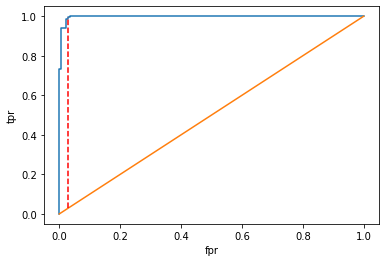

In [100]:
plt.plot(fpr, tpr)
plt.plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10))
plt.plot((fpr[idx],fpr[idx]), (fpr[idx], tpr[idx]), color="red", linestyle="--")
plt.xlabel("fpr")
plt.ylabel("tpr")

Text(0, 0.5, 'Probability')

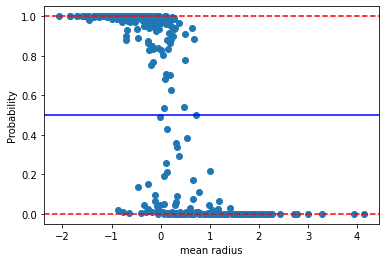

In [101]:
plt.scatter(x=scaled_train_data[:,0], y=train_pred_logit)
plt.axhline(best_thresh, color="blue")
plt.axhline(0, color="red", linestyle="--")
plt.axhline(1, color="red", linestyle="--")
plt.xlabel("mean radius")
plt.ylabel("Probability")

* Threshold로 예측값 0,1로 변환 후 정확도

In [102]:
train_pred_label = list(map(int, (train_pred_logit > best_thresh)))
test_pred_label = list(map(int, (test_pred_logit > best_thresh)))

In [103]:
proba_train_accuracy = accuracy_score(y_train, train_pred_label)
proba_test_accuracy = accuracy_score(y_test, test_pred_label)

print(f"Train accuracy is : {proba_train_accuracy:.2f}")
print(f"Test accuracy is : {proba_test_accuracy:.2f}")

Train accuracy is : 0.98
Test accuracy is : 0.97


In [104]:
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

print(f"Train accuracy is : {train_accuracy:.2f}")
print(f"Test accuracy is : {test_accuracy:.2f}")

Train accuracy is : 0.98
Test accuracy is : 0.97


* 전체 정리

In [105]:
print(f"Linear Regression Test Accuracy: {linear_test_accuracy:.2f}")
print(f"Logistic Regression predict_proba Test Accuracy: {proba_test_accuracy:.2f}")
print(f"Logistic Regression predict Test Accuracy: {test_accuracy:.2f}")

Linear Regression Test Accuracy: 0.96
Logistic Regression predict_proba Test Accuracy: 0.97
Logistic Regression predict Test Accuracy: 0.97


---

## [ Logistic Regression : iris 데이터]

### 1. 데이터 load 및 EDA

#### 1-1. 데이터 laod

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

In [107]:
from sklearn.datasets import load_iris

iris = load_iris()

In [108]:
iris.feature_names, iris.target_names

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [109]:
data, target = iris.data, iris.target

data.shape, target.shape

((150, 4), (150,))

#### 1-2. EDA

In [110]:
df = pd.DataFrame(data, columns=iris.feature_names)

df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [111]:
pd.Series(target).value_counts()

0    50
1    50
2    50
dtype: int64

### 2. Multiclass

#### 2-1. train data/test_data => 분포에 동일하게 분류하기

In [112]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=2022)

print('train data :', len(X_train))
print('test data :', len(X_test))

train data : 105
test data : 45


* data split에 따른 target의 분류

In [113]:
print('y_train :', pd.Series(y_train).value_counts())
print('y_test :', pd.Series(y_test).value_counts())

y_train : 0    36
1    35
2    34
dtype: int64
y_test : 2    16
1    15
0    14
dtype: int64


* stratify : 원본 데이터의 정답 분포를 반영해 데이터 split

In [114]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=2022, stratify=target)

print('data :', pd.Series(target).value_counts())
print('y_train :', pd.Series(y_train).value_counts())
print('y_test :', pd.Series(y_test).value_counts())


data : 0    50
1    50
2    50
dtype: int64
y_train : 1    35
0    35
2    35
dtype: int64
y_test : 2    15
0    15
1    15
dtype: int64


#### 2-2. 데이터 시각화

In [115]:
X = X_train[:, :2]

(1.5, 4.9)

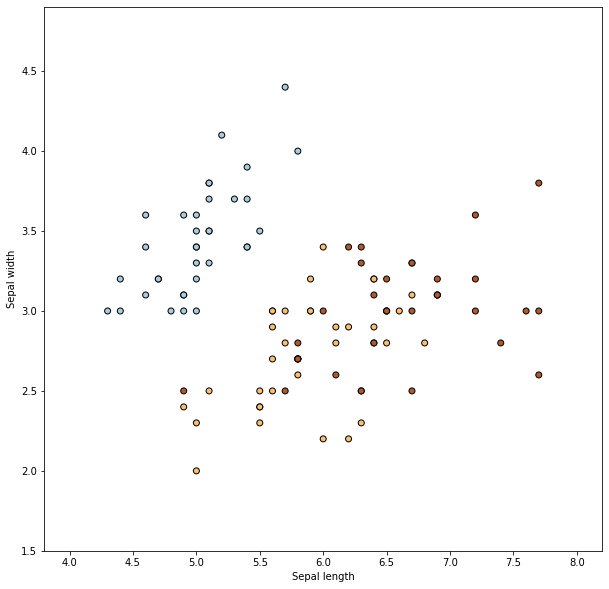

In [116]:
plt.figure(1, figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(X[:,0].min()-0.5, X[:,0].max()+0.5)
plt.ylim(X[:,1].min()-0.5, X[:,1].max()+0.5)

#### 2-3. One vs Rest => multi_class="ovr"

* 3개의 분류 결과에 대해 하나를 선택하면 나머지 두 개는 나머지로

In [117]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class="ovr")

model.fit(X, y_train) # sepal 데이터만 가지고 분류

LogisticRegression(multi_class='ovr')

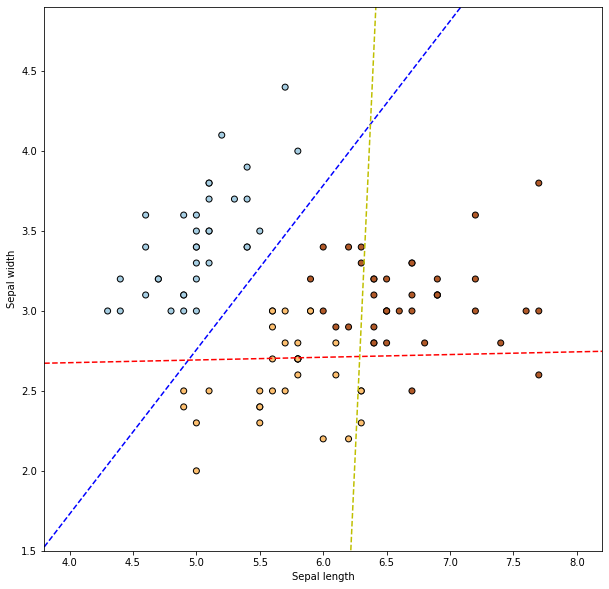

In [118]:
x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5

plt.figure(figsize=(10, 10))

plt.scatter(X[:, 0], X[:, 1], c=model.predict(X), edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

coef = model.coef_
intercept = model.intercept_

def plot_hyperplane(c, color):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1] # 왜 나눌까..
    plt.plot([x_min, x_max], [line(x_min), line(x_max)],
             ls="--", color=color) # (x_min, line(x_min))과 (x_max, line(x_max)) 연결선

for i, color in zip(model.classes_, "bry"):
    plot_hyperplane(i, color)

* 학습

In [119]:
ovr_logit = LogisticRegression(multi_class="ovr")

ovr_logit.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

* 예측

In [120]:
ovr_train_pred = ovr_logit.predict(X_train)
ovr_test_pred = ovr_logit.predict(X_test)

* 평가

In [121]:
from sklearn.metrics import accuracy_score

ovr_train_acc = accuracy_score(y_train, ovr_train_pred)
ovr_test_acc = accuracy_score(y_test, ovr_test_pred)

print(f"One vs Rest Train accuracy is : {ovr_train_acc:.2f}")
print(f"One vs Rest Test accuracy is : {ovr_test_acc:.2f}")

One vs Rest Train accuracy is : 0.96
One vs Rest Test accuracy is : 0.91


#### 2-4. Multinomial => multi_class="multinomial"

* 정답의 분포가 Multinomial 분포를 따른다고 가정한 후 시행하는 Multiclass Logistic Regression
* LogisticRegression의 기본 값은 "multinomial"

In [122]:
multi_logit = LogisticRegression(multi_class="multinomial")
multi_logit.fit(X, y_train)

LogisticRegression(multi_class='multinomial')

* 교차되는 한 점이 있음

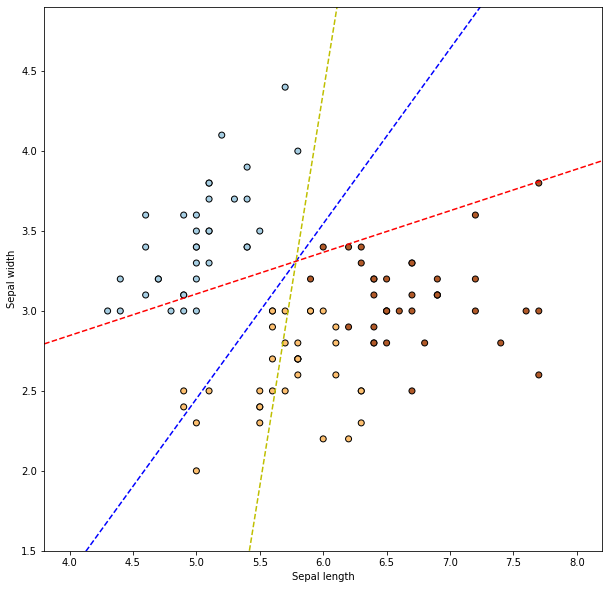

In [123]:
x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5

plt.figure(1, figsize=(10, 10))

plt.scatter(X[:, 0], X[:, 1], c=multi_logit.predict(X), edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

coef = multi_logit.coef_
intercept = multi_logit.intercept_

def plot_hyperplane(c, color):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
    plt.plot([x_min, x_max], [line(x_min), line(x_max)],
             ls="--", color=color)

for i, color in zip(multi_logit.classes_, "bry"):
    plot_hyperplane(i, color)

* 학습

In [124]:
multi_logit.fit(X_train, y_train)

C:\Users\jack0\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

* 예측

In [125]:
train_pred_proba = multi_logit.predict_proba(X_train)

# 1번째 데이터 예시
sample_pred = train_pred_proba[0]
print(sample_pred)
print(f"class 0에 속하지 않을 확률: {1 - sample_pred[0]:.4f}")
print(f"class 1과 2에 속할 확률: {sample_pred[1:].sum():.4f}")


[0.01001145 0.91860313 0.07138543]
class 0에 속하지 않을 확률: 0.9900
class 1과 2에 속할 확률: 0.9900


In [126]:
train_pred = multi_logit.predict(X_train)
test_pred = multi_logit.predict(X_test)

* 평가

In [127]:
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

print(f"Train accuracy is : {train_acc:.2f}")
print(f"Test accuracy is : {test_acc:.2f}")

Train accuracy is : 0.98
Test accuracy is : 0.93
